*Libraries Imported*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

*Dataset Imported*

In [2]:
dataframe = pd.ExcelFile('Data Insights Task.xlsx')

# *Team Data*

**Phase 1: Cleaning the dataset, checking if there are any missing values or any duplicates.**

In [6]:
team_df = dataframe.parse('TEAM DATA')
print(team_df.head())

  Team Name  Games  Goal Difference  xG Difference w/Pen  NP Goal Difference  \
0   England      1                2                  0.1                   2   
1   Germany      1               -2                 -0.1                  -2   

   NP xG Difference  Goals  NP xG  xG/Shot  OP xG  ...  Pressures F2  \
0               0.1      2   1.16     0.23   0.97  ...            81   
1              -0.1      0   1.06     0.12   0.93  ...            41   

   Pressures F2%  Counterpressures F2  Counterpressures F2%  Yellow Cards  \
0             61                   15                    63             3   
1             34                   11                    58             2   

   2nd Yellows  Red Cards  Possession%  Possessions  Ball In Play Time  
0            0          0           46          183              56.49  
1            0          0           54          183              56.49  

[2 rows x 93 columns]


In [5]:
#checking for missing values
print(team_df.isnull().sum())

Team Name              0
Games                  0
Goal Difference        0
xG Difference w/Pen    0
NP Goal Difference     0
                      ..
2nd Yellows            0
Red Cards              0
Possession%            0
Possessions            0
Ball In Play Time      0
Length: 93, dtype: int64


In [7]:
#checking for duplicate values
print(team_df.duplicated().sum())

0


**Phase 2: Exploring and Analysing the data**

This will be done on the bases of few points such as
- Goals
- xG/Shots
- NP xG
- Possesion%
- Successful Passes
- Pressure
- PPDA

In [7]:
#Comparing Goals for both teams
Goal_df=team_df.sort_values(by='Goals', ascending=False)
print(Goal_df.head()[['Team Name', 'Goals']])

  Team Name  Goals
0   England      2
1   Germany      0


In [8]:
#Comparing xG per shot for both teams
xG_df=team_df.sort_values(by='xG/Shot', ascending=False)
print(xG_df.head()[['Team Name', 'xG/Shot']])

  Team Name  xG/Shot
0   England     0.23
1   Germany     0.12


In [8]:
#Comparing NP xG for both teams
npxG_df=team_df.sort_values(by='NP xG', ascending=False)
print(npxG_df.head()[['Team Name', 'NP xG']])

  Team Name  NP xG
0   England   1.16
1   Germany   1.06


In [10]:
#Comparing possesion% for both teams
possesion_df=team_df.sort_values(by='Possession%', ascending=False)
print(possesion_df.head()[['Team Name', 'Possession%']])

  Team Name  Possession%
1   Germany           54
0   England           46


In [11]:
#Comparing Successful Passes for both teams
passes_df=team_df.sort_values(by='Successful Passes', ascending=False)
print(passes_df.head()[['Team Name', 'Successful Passes']])

  Team Name  Successful Passes
1   Germany                470
0   England                395


In [12]:
#Comparing Pressures for both teams
pressure_df=team_df.sort_values(by='Pressures', ascending=False)
print(pressure_df.head()[['Team Name', 'Pressures']])

  Team Name  Pressures
0   England        133
1   Germany        120


In [13]:
#Comparing PPDA for both teams
ppda_df=team_df.sort_values(by='PPDA', ascending=False)
print(ppda_df.head()[['Team Name', 'PPDA']])

  Team Name   PPDA
0   England  14.54
1   Germany  13.55


**Phase 3: Create Visuals for the data**

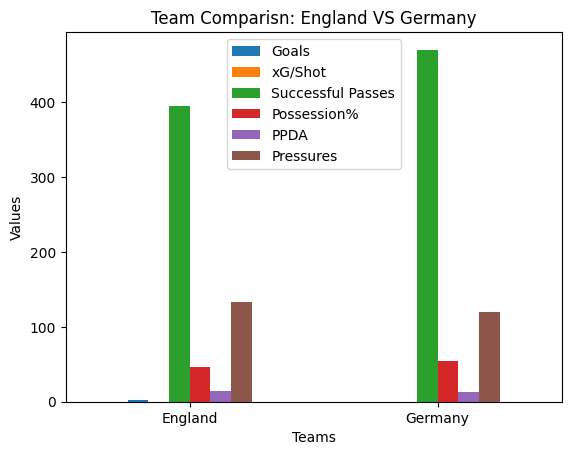

In [14]:
#visualising the data
gph_df=team_df[['Team Name', 'Goals','xG/Shot', 'Successful Passes','Possession%','PPDA','Pressures']]
gph_df = gph_df.set_index('Team Name')
gph_df.plot(kind='bar')
plt.title('Team Comparisn: England VS Germany')
plt.xlabel('Teams')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

# *Player Data*

**Phase 1: Cleaning the dataset, checking if there are any missing values or any duplicates.**

In [4]:
player_df = dataframe.parse('PLAYER DATA')
print(player_df.head())

               Name     Team  Minutes   Primary Position  All Goals  NP Goals  \
0       Kyle Walker  England       96  Right Centre Back          0         0   
1   Kieran Trippier  England       96    Right Wing Back          0         0   
2       John Stones  England       96        Centre Back          0         0   
3  Jordan Henderson  England        7                NaN          0         0   
4   Raheem Sterling  England       96          Left Wing          1         1   

     xG  xG/Shot  Shots  Goal Conversion%  ...  LBP Received 10m in F2  \
0  0.00      NaN      0               NaN  ...                       0   
1  0.00      NaN      0               NaN  ...                       0   
2  0.00      NaN      0               NaN  ...                       0   
3  0.00      NaN      0               NaN  ...                       0   
4  0.53     0.26      2              50.0  ...                       0   

   LBP Received Avg Dist in F2  LBP to Space 2m in F3  LBP to Space 

In [16]:
#checking for missing values
print(player_df.isna().sum())

Name                            0
Team                            0
Minutes                         0
Primary Position                5
All Goals                       0
                               ..
LBP Avg Dist in F3             19
LBP Received 2m in F3           0
LBP Received 5m in F3           0
LBP Received 10m in F3          0
LBP Received Avg Dist in F3    16
Length: 191, dtype: int64


In [5]:
#checking for duplicate values
print(player_df.duplicated().sum())

0


**Phase 2: Exploring and Analysing the data**

This will be done on the bases of few points such as

- All Goals
- xG
- Minutes
- Key Passes
- Pressure and Tackles
- Assits

In [18]:
# Comparing which player scored the most Goals in the match and belonged to which team
goals_df = player_df.sort_values(by='All Goals', ascending=False)
print(goals_df[goals_df['All Goals']>0][['Team', 'Name', 'Primary Position','All Goals']])

      Team             Name Primary Position  All Goals
6  England       Harry Kane   Centre Forward          1
4  England  Raheem Sterling        Left Wing          1


In [ ]:
# Comparing which player scored the higest xG in the match and belonged to which team
xG_df = player_df.sort_values(by='xG', ascending=False).head(5)
print(xG_df[xG_df['xG']>0][['Team', 'Name','Primary Position', 'xG']])


       Team             Name  Primary Position    xG
4   England  Raheem Sterling         Left Wing  0.53
6   England       Harry Kane    Centre Forward  0.44
18  Germany    Thomas Müller         Left Wing  0.35
14  Germany     Robin Gosens    Left Wing Back  0.29
10  England    Harry Maguire  Left Centre Back  0.20


In [ ]:
# Comparing which player has most minutes in the match and belonged to which team
min_df = player_df.sort_values(by='Minutes', ascending=False).head(10)
print(min_df[min_df['Minutes']>20][['Team', 'Name','Primary Position', 'Minutes']])

       Team             Name            Primary Position  Minutes
0   England      Kyle Walker           Right Centre Back       96
1   England  Kieran Trippier             Right Wing Back       96
2   England      John Stones                 Centre Back       96
4   England  Raheem Sterling                   Left Wing       96
10  England    Harry Maguire            Left Centre Back       96
5   England        Luke Shaw              Left Wing Back       96
6   England       Harry Kane              Centre Forward       96
8   England  Jordan Pickford                  Goalkeeper       96
9   England  Kalvin Phillips  Right Defensive Midfielder       96
16  Germany     Mats Hummels                 Centre Back       96


In [ ]:
# Comparing which player with most key passes in the match and belonged to which team
key_df = player_df.sort_values(by='Key Passes', ascending=False).head(5)
print(key_df[key_df['Key Passes']>0][['Team', 'Name','Primary Position', 'Key Passes']])

       Team             Name           Primary Position  Key Passes
1   England  Kieran Trippier            Right Wing Back           2
18  Germany    Thomas Müller                  Left Wing           2
26  Germany      Kai Havertz                 Right Wing           2
11  England      Declan Rice  Left Defensive Midfielder           1
7   England    Jack Grealish                  Left Wing           1


In [5]:
# Comparing which player has most pressure and tackle in the match and belonged to which team
prs_df = player_df.sort_values(by='Pressures', ascending=False).head(5)
print(prs_df[prs_df['Pressures']>5][['Team', 'Name','Primary Position', 'Pressures']])

#tackle
tck_df = player_df.sort_values(by='Tackles', ascending=False).head(5)
print(tck_df[tck_df['Tackles']>0][['Team', 'Name','Primary Position', 'Tackles']])

       Team             Name            Primary Position  Pressures
11  England      Declan Rice   Left Defensive Midfielder         22
18  Germany    Thomas Müller                   Left Wing         22
9   England  Kalvin Phillips  Right Defensive Midfielder         19
6   England       Harry Kane              Centre Forward         19
12  England      Bukayo Saka                  Right Wing         17
       Team             Name            Primary Position  Tackles
16  Germany     Mats Hummels                 Centre Back        4
11  England      Declan Rice   Left Defensive Midfielder        3
19  Germany       Toni Kroos  Right Defensive Midfielder        3
25  Germany   Joshua Kimmich             Right Wing Back        3
4   England  Raheem Sterling                   Left Wing        2


In [ ]:
# Comparing which player as assits in the match and belonged to which team
assists_df = player_df.sort_values(by='Assists', ascending=False)
print(assists_df[assists_df['Assists']>0][['Team', 'Name','Primary Position', 'Assists']])

      Team           Name Primary Position  Assists
7  England  Jack Grealish        Left Wing        1
5  England      Luke Shaw   Left Wing Back        1


**Phase 3: Create Visuals for the data**

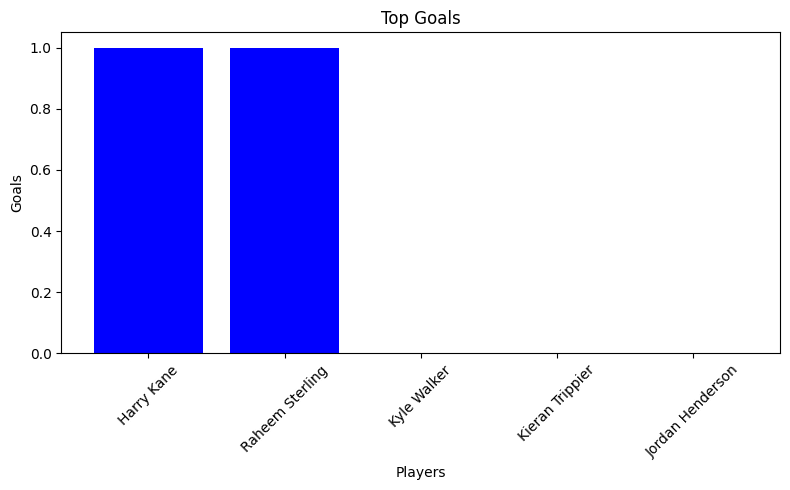

In [ ]:
#plot for Number of goals made and by which player
plot_df = player_df[['Name', 'All Goals']].sort_values(by='All Goals', ascending=False).head(5)
plt.figure(figsize=(8,5))
plt.bar(plot_df['Name'], plot_df['All Goals'], color='blue')
plt.title('Top Goals')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


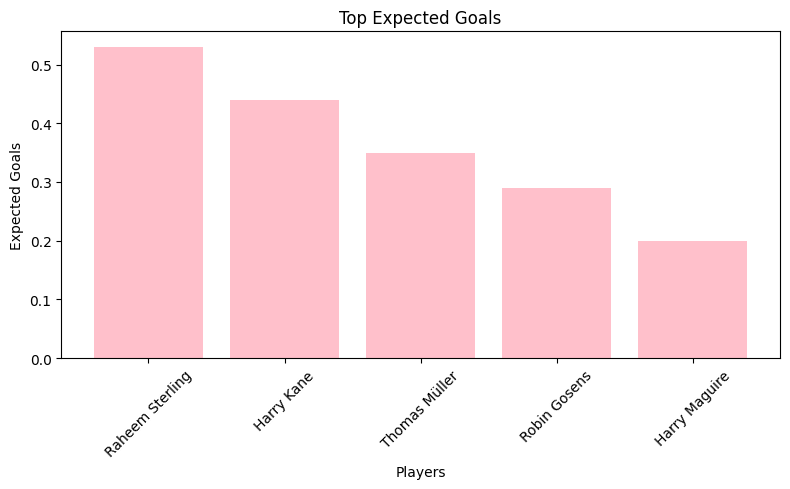

In [ ]:
#plot for number of expected goals and by which player
plot_df = player_df[['Name', 'xG']].sort_values(by='xG', ascending=False).head(5)
plt.figure(figsize=(8,5))
plt.bar(plot_df['Name'], plot_df['xG'], color='pink')
plt.title('Top Expected Goals')
plt.xlabel('Players')
plt.ylabel('Expected Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

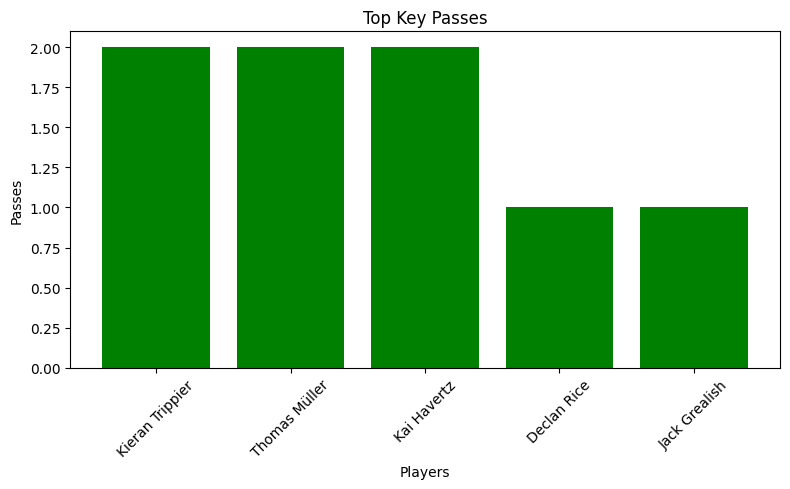

In [ ]:
#plot for key passes made and by which player
plot_df = player_df[['Name', 'Key Passes']].sort_values(by='Key Passes', ascending=False).head(5)
plt.figure(figsize=(8,5))
plt.bar(plot_df['Name'], plot_df['Key Passes'], color='green')
plt.title('Top Key Passes')
plt.xlabel('Players')
plt.ylabel('Passes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Phase 4: Advance Analysis on the basis of**
- Correlation Heatmap
- Top Contibutors per Role


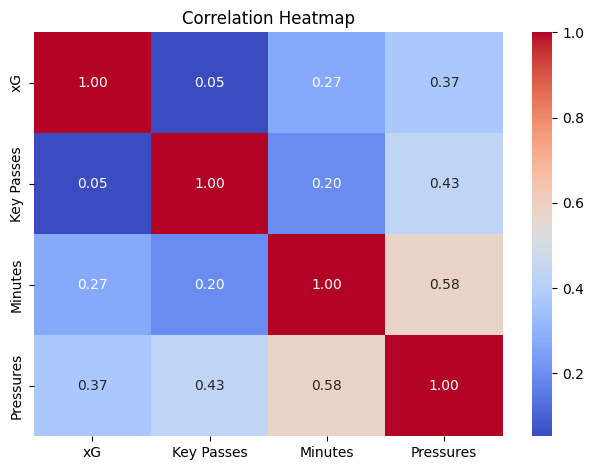

In [ ]:
#corelation heatmap
cor_df= player_df[['xG', 'Key Passes', 'Minutes', 'Pressures']].corr()
sb.heatmap(cor_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


                                  xG  Key Passes
Primary Position                                
Centre Forward              0.310000         0.0
Left Wing                   0.293333         1.0
Left Wing Back              0.145000         0.5
Left Centre Back            0.100000         0.0
Left Defensive Midfielder   0.060000         0.5
Right Wing                  0.060000         1.0
Centre Back                 0.000000         0.0
Goalkeeper                  0.000000         0.0
Right Centre Back           0.000000         0.0
Right Defensive Midfielder  0.000000         0.0
Right Wing Back             0.000000         1.5


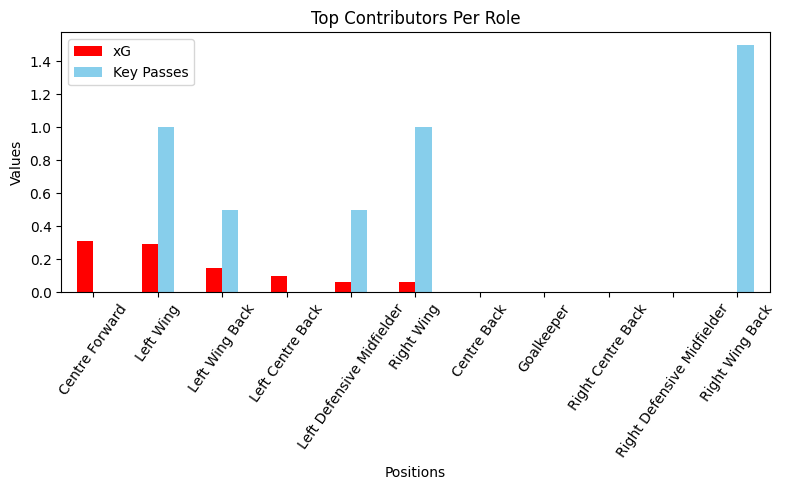

In [ ]:
#top contributors per role
pos_df = player_df.groupby('Primary Position').agg({'xG':'mean', 'Key Passes': 'mean'}).sort_values(by='xG', ascending=False)
print(pos_df)

pos_df.plot(kind='bar', figsize=(8,5), color=['red','skyblue'])
plt.title('Top Contributors Per Role')
plt.xlabel('Primary Positions')
plt.ylabel('Values')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

                            Pressures    Minutes
Primary Position                                
Left Defensive Midfielder   17.000000  92.500000
Right Wing                  16.500000  83.000000
Right Defensive Midfielder  16.000000  96.000000
Centre Forward              14.000000  83.000000
Left Wing                   12.333333  71.666667
Left Wing Back              11.500000  92.000000
Right Wing Back             10.000000  96.000000
Centre Back                  8.500000  96.000000
Left Centre Back             7.500000  96.000000
Right Centre Back            6.000000  92.000000
Goalkeeper                   0.000000  96.000000


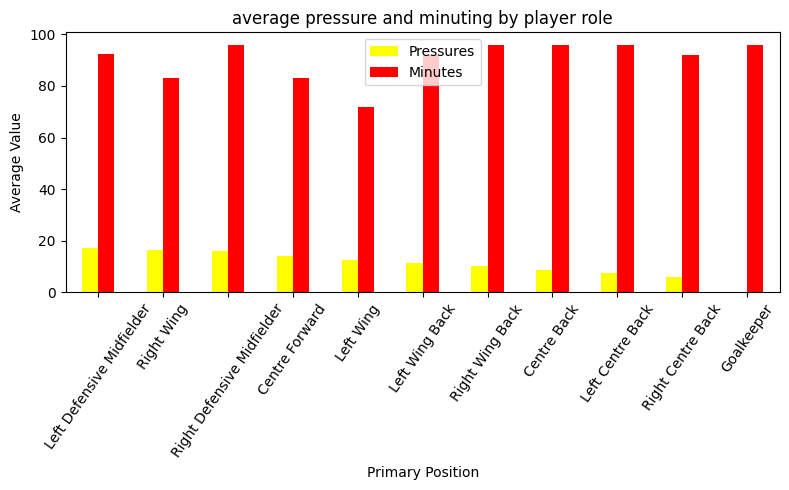

In [7]:
#average pressure and minuting by player role

press_df = player_df.groupby('Primary Position').agg({'Pressures':'mean', 'Minutes': 'mean'}).sort_values(by='Pressures', ascending=False)
print(press_df)

press_df.plot(kind='bar', figsize=(8,5), color=('yellow', 'Red'))
plt.title('average pressure and minuting by player role')
plt.xlabel('Primary Position')
plt.ylabel('Average Value')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()